# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [79]:
from scipy import stats 
import numpy as np
import math
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
from scipy.stats import norm

In [80]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.

The t-statistic is:  34.056241516158195
The p-value is:  7.228892044970457e-15
Rejecting the Null Hypothesis i.e.Accepting the Alternative Hypothesis for GPU1


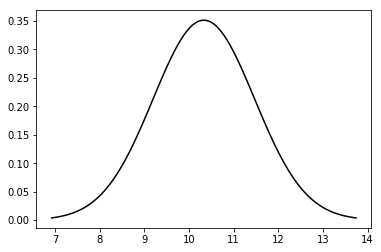

In [102]:
## one sample t-test
## Given: n = 15
## H0: mean = 0
## H1: mean <> 0

t_statistic_GPU1, p_value_GPU1 = ttest_1samp(GPU1, 0)
print ("The t-statistic is: ", t_statistic_GPU1)
print ("The p-value is: ", p_value_GPU1)

# p_value > 0.05 => null hypothesis:
if (p_value > 0.05):
    print("Accepting the Null Hypothesis for GPU1")
else:
    print("Rejecting the Null Hypothesis i.e.Accepting the Alternative Hypothesis for GPU1")


mu = np.mean(GPU1) 
variance = np.var(GPU1)
sigma = np.std(GPU1)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),color = 'black')
plt.show()

## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [40]:
## two sample t-test
## H0: There is no significant difference between data sets
## H1:There is a significant difference

t_statistic_GPU, p_value_GPU = ttest_ind(GPU1, GPU2)

print ("The t-statistic is: ", t_statistic_GPU)
print ("The p-value is: ", p_value_GPU)

# p_value > 0.05 => null hypothesis:
if (p_value_GPU > 0.05):
    print("Accepting the Null Hypothesis")
else:
    print("Accepting the Alternative Hypothesis i.e. Rejecting Null Hypothesis")

The t-statistic is:  -2.627629513471839
The p-value is:  0.013794282041452725
Accepting the Alternative Hypothesis i.e. Rejecting Null Hypothesis


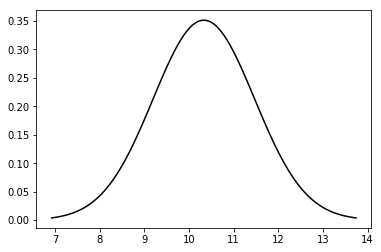

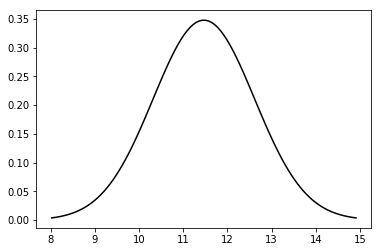

In [105]:
mu1 = np.mean(GPU1) 
sigma1 = np.std(GPU1)
x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100)
plt.plot(x, stats.norm.pdf(x1, mu1, sigma1),color = 'black')
plt.show()

mu2 = np.mean(GPU2) 
sigma2 = np.std(GPU2)
x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
plt.plot(x2, stats.norm.pdf(x2, mu2, sigma2),color = 'black')
plt.show()




## Question 3

He is trying a third GPU - GPU3.

In [38]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [41]:
## two sample t-test
## H0: There is no significant difference between speeds of two GPUs - GPU1 and GPU3
## H1: There is a significant difference

H0 = "There is no significant difference between speeds of two GPUs - GPU1 and GPU3"
H1 = "There is significant difference between speeds of two GPUs - GPU1 and GPU3"

t_statistic_GPU3, p_value_GPU3 = ttest_ind(GPU1, GPU3)

print ("The t-statistic is: ", t_statistic_GPU3)
print ("The p-value is: ", p_value_GPU3)

# p_value > 0.05 => null hypothesis:
if (p_value_GPU3 > 0.05):
    print("Accepting the Null Hypothesis")
    print(H0)
else:
    print("Rejecting the Null Hypothesis and accepting the Alternative Hypothesis")
    print("H1")

The t-statistic is:  -1.4988943759093303
The p-value is:  0.14509210993138993
Accepting the Null Hypothesis
There is no significant difference between speeds of two GPUs - GPU1 and GPU3


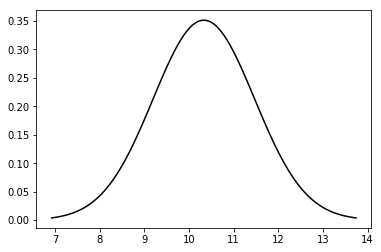

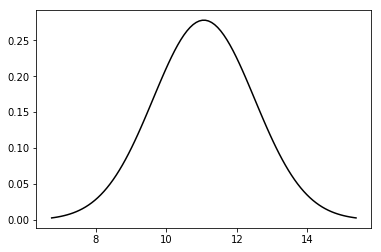

In [107]:
mu1 = np.mean(GPU1) 
sigma1 = np.std(GPU1)
x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100)
plt.plot(x, stats.norm.pdf(x1, mu1, sigma1),color = 'black')
plt.show()

mu3 = np.mean(GPU3) 
sigma3 = np.std(GPU3)
x3 = np.linspace(mu3 - 3*sigma3, mu3 + 3*sigma3, 100)
plt.plot(x3, stats.norm.pdf(x3, mu3, sigma3),color = 'black')
plt.show()

## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [42]:
import numpy as np

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

#### Answer:

In [115]:
from scipy.stats import levene
H0 = "Mean1 <> Mean2 <> Mean3, i.e. All three experiments are significantly different."
H1 = "Mean1 = Mean2 = Mean3, i.e. All three experiments are not significantly different."

e_statistic, e_pvalue = levene(e1,e2,e3)

print ("The statistic is: ", e_statistic)
print ("The p-value is: ", e_pvalue)

# p_value > 0.05 => null hypothesis:
if (e_pvalue > 0.05):
    print("Samples - e1,e2,e3 are with equal variances, passes the test of equality of variances.")
else:
    print("Samples - e1,e2,e3 are not with equal variances, doesn't passes the test of equality of variances.")


The statistic is:  2.6741725711150446
The p-value is:  0.12259792666001798
Samples - e1,e2,e3 are with equal variances, passes the test of equality of variances.


## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

In [135]:
stats.f_oneway(e1,e2,e3)

F_onewayResult(statistic=2.51357622845924, pvalue=0.13574644501798466)

## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*


In [138]:
## Type I error - In statistical hypothesis testing a type I error is the rejection of a true null hypothesis. Type 1 errors
## have a probability of  “alpha” correlated to the level of confidence that you set. A test with a 95% confidence 
## level means that there is a 5% chance of getting a type 1 error.
## Type II error is the acceptance of a false null hypothesis. Type 2 errors happen when you inaccurately assume 
## that no winner has been declared between a control version and a variation although there actually is a winner.

## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.



In [ ]:
## Null Hypothesis - Waiting time to place an order has not changed in the past month 
##                    from its previous population mean value of 4.5 minutes.

## Alternate Hypothesis - Waiting time to place an order has changed in the past month 
##                    from its previous population mean value of 4.5 minutes.

## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [162]:
import numpy as np
from scipy.stats import chi2,chisquare,chi2_contingency

d1 = [5, 8, 3, 8]
d2 = [9, 6, 8, 5]
d3 = [8, 12, 7, 2]
d4 = [4, 16, 7, 3]
d5 = [3, 9, 6, 5]
d6 = [7, 2, 5, 7]

dice = np.array([d1, d2, d3, d4, d5, d6])
chi_dataset = pd.DataFrame({'Player1':dice[:,0],'Player2':dice[:,1], 'Player3':dice[:,2], 'Player4':dice[:,3]})
chi_dataset.rename(index={0: 'd1', 1: 'd2', 2: 'd3', 3: 'd4', 4: 'd5', 5: 'd6'}, inplace = True)
chi_dataset

,Player1,Player2,Player3,Player4
d1,5,8,3,8
d2,9,6,8,5
d3,8,12,7,2
d4,4,16,7,3
d5,3,9,6,5
d6,7,2,5,7


run the test using SciPy Stats library

Depending on the test, we are generally looking for a threshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



In [175]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(dice)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
23.315671914716496


===Degrees of Freedom===
15


===P-Value===
0.07766367301496693


===Contingency Table===
[[ 5.57419355  8.20645161  5.57419355  4.64516129]
 [ 6.50322581  9.57419355  6.50322581  5.41935484]
 [ 6.73548387  9.91612903  6.73548387  5.61290323]
 [ 6.96774194 10.25806452  6.96774194  5.80645161]
 [ 5.34193548  7.86451613  5.34193548  4.4516129 ]
 [ 4.87741935  7.18064516  4.87741935  4.06451613]]


## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [189]:
z_score = stats.zscore(dice)
print("Z-Score of above dataset dice is: \n",z_score)


Z-Score of above dataset dice is: 
 [[-0.46291005 -0.18884739 -1.83711731  1.44115338]
 [ 1.38873015 -0.64208114  1.22474487  0.        ]
 [ 0.9258201   0.7176201   0.61237244 -1.44115338]
 [-0.9258201   1.62408759  0.61237244 -0.96076892]
 [-1.38873015  0.03776948  0.          0.        ]
 [ 0.46291005 -1.54854863 -0.61237244  0.96076892]]


In [195]:
p_values = 1 - scipy.special.ndtr(z_score)
print ("P values from above Z core of dice dataset: \n",p_values)

P values from above Z core of dice dataset: 
 [[0.67828558 0.57489379 0.96690371 0.07477068]
 [0.08245741 0.73958975 0.11033568 0.5       ]
 [0.17726974 0.23649578 0.27014569 0.92522932]
 [0.82273026 0.05217856 0.27014569 0.83166582]
 [0.91754259 0.48493574 0.5        0.5       ]
 [0.32171442 0.93925487 0.72985431 0.16833418]]


In [197]:
mean = p_values.mean()
print("Mean of P value of Z Score of Dice is: \n",mean)

Mean of P value of Z Score of Dice is: 
 0.49478056512575197


## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [185]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.

Ttest_relResult(statistic=4.79633261669182, pvalue=2.136915252169357e-06)

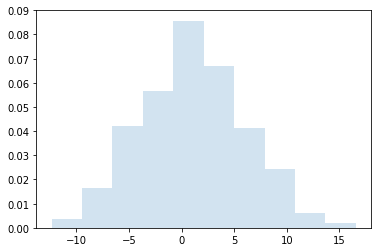

In [209]:
##Null hypothesis (H0): No Weight-loss after drug treatment.
## Alternative hypothesis (HA): Weight-loss after drug treatment.

fig, ax = plt.subplots(1, 1)
ax.hist(before-after, density=True, histtype='stepfilled', alpha=0.2)

stats.ttest_rel(before,after)

